In [2]:
run main.py

In [3]:
steam = clean_steam_data(steam_path)
steam = steam_game_totals(steam)
steam

game
Dota 2                                         981684.6
Counter-Strike Global Offensive                322771.6
Team Fortress 2                                173673.3
Counter-Strike                                 134261.1
Sid Meier's Civilization V                      99821.3
Counter-Strike Source                           96075.5
The Elder Scrolls V Skyrim                      70889.3
Garry's Mod                                     49725.3
Call of Duty Modern Warfare 2 - Multiplayer     42009.9
Left 4 Dead 2                                   33596.7
Name: playtime, dtype: float64
game
Dota 2                             4841
Team Fortress 2                    2323
Counter-Strike Global Offensive    1377
Unturned                           1069
Left 4 Dead 2                       801
Counter-Strike Source               715
The Elder Scrolls V Skyrim          677
Garry's Mod                         666
Counter-Strike                      568
Sid Meier's Civilization V          554

,playtime,user,usercount,Hours/User
game,,,,
007 Legends,0.7,46055854,1,0.700000
0RBITALIS,1.2,191026593,3,0.400000
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),20.0,302735056,5,4.000000
10 Second Ninja,5.9,136666190,2,2.950000
"10,000,000",3.6,33865373,1,3.600000
...,...,...,...,...
rymdkapsel,1.1,49630184,1,1.100000
sZone-Online,56.7,9431144920,58,0.977586
the static speaks my name,2.0,1468962719,8,0.250000


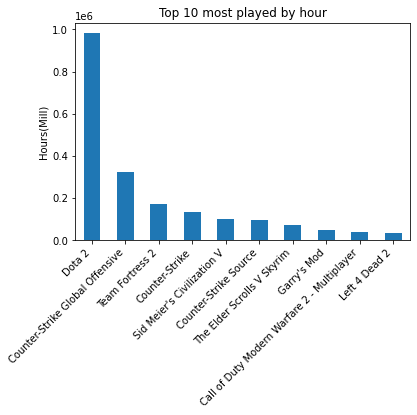

In [4]:
top10_playtime = steam.sort_values('playtime', ascending=False)['playtime'].head(10)
top10_playtime.plot.bar()
plt.xticks(rotation=45, ha='right')
plt.ylabel('Hours(Mill)')
plt.xlabel('')
plt.title("Top 10 most played by hour")
plt.savefig("images/top10gamesplayed.jpg")

,playtime,user,usercount,Hours/User
game,,,,
Eastside Hockey Manager,1295.0,213854339,1,1295.000000
Baldur's Gate II Enhanced Edition,4277.3,693505111,9,475.255556
FIFA Manager 09,411.0,46301758,1,411.000000
Perpetuum,1603.9,268924449,4,400.975000
Football Manager 2014,30574.8,8054148061,78,391.984615
Football Manager 2012,30845.8,5891630159,79,390.453165
Football Manager 2010,13126.7,1970692057,35,375.048571
Football Manager 2011,11336.8,1882448702,31,365.703226
Freaking Meatbags,331.0,33651880,1,331.000000


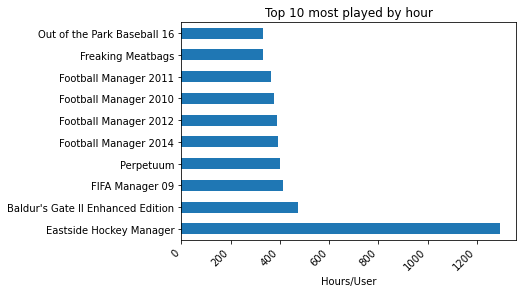

In [5]:
top10_owned = steam.sort_values('Hours/User', ascending=False)['Hours/User'].head(10)
top10_owned.plot.barh()
plt.xticks(rotation=45, ha='right')
plt.ylabel('')
plt.xlabel('Hours/User')
plt.title("Top 10 most played by hour")
steam.sort_values('Hours/User', ascending=False).head(10)

,playtime,user,usercount,Hours/User
game,,,,
Eastside Hockey Manager,1295.0,213854339,1,1295.000000
Baldur's Gate II Enhanced Edition,4277.3,693505111,9,475.255556
FIFA Manager 09,411.0,46301758,1,411.000000
Perpetuum,1603.9,268924449,4,400.975000
Football Manager 2014,30574.8,8054148061,78,391.984615
Football Manager 2012,30845.8,5891630159,79,390.453165
Football Manager 2010,13126.7,1970692057,35,375.048571
Football Manager 2011,11336.8,1882448702,31,365.703226
Freaking Meatbags,331.0,33651880,1,331.000000


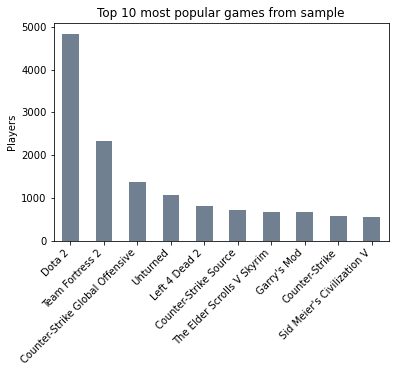

In [6]:
top10_owned = steam.sort_values('usercount', ascending=False)['usercount'].head(10)
top10_owned.plot.bar(color=['slategrey'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Players')
plt.xlabel('')
plt.title("Top 10 most popular games from sample")
steam.sort_values('Hours/User', ascending=False).head(10)

In [7]:
totaltime = steam.playtime.sum()
sum_other = steam.copy()
sum_other['cumcount'] = steam['playtime'].cumsum() / totaltime
sum_other['name'] = np.where(sum_other['cumcount']> 0.75, 'Other', sum_other.index)

In [8]:
sum_other = sum_other.groupby('name').sum()
sum_other = sum_other.sort_values('playtime', ascending = False)
sum_other

,playtime,user,usercount,Hours/User,cumcount
name,,,,,
Dota 2,981684.6,876244856902,4841,202.785499,0.576534
Other,870152.2,3018151701457,28368,17954.187544,1354.062986
Counter-Strike Global Offensive,322771.6,197100863262,1377,234.402033,0.235445
Counter-Strike,134261.1,35238993239,568,236.375176,0.139333
Counter-Strike Source,96075.5,45094355122,715,134.371329,0.263915
...,...,...,...,...,...
Killing Floor Beta,0.1,14465359,1,0.100000,0.704810
Inside a Star-filled Sky,0.1,46028967,1,0.100000,0.698007
Epic Cards Battle(TCG),0.1,44866715,1,0.100000,0.590779


Text(0.5, 1.0, 'Total sampled playtime')

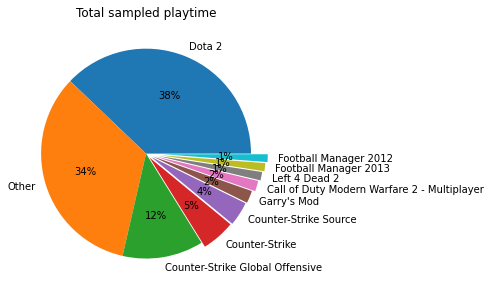

In [24]:
sum_other['playtime'].head(10).plot.pie(autopct='%.0f%%', explode=(0, 0, 0, 0.05,0.06,0.07,0.1,0.12,0.14,.16))
plt.tight_layout(pad =1)
plt.ylabel('')
plt.title('Total sampled playtime')